# Import all libraries:-

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Import the dataset:-

In [2]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

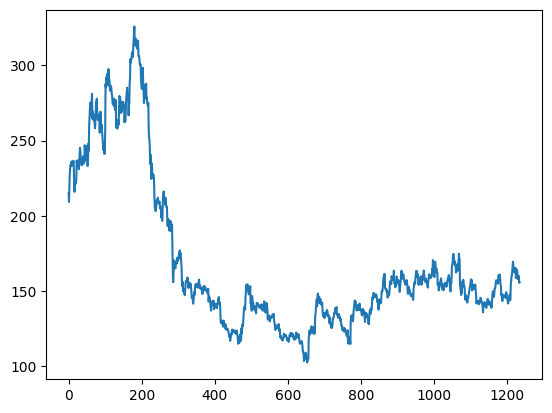

In [5]:
plt.plot(df["Close"])

In [6]:
df_close = df["Close"]
df_close

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

# Feature Scaling (MinMax Scaler):-

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_close_scaled = sc.fit_transform(np.array(df_close).reshape(-1,1))
df_close_scaled

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

# Split the dataset into train and test:-

In [8]:
train_data = int(len(df_close_scaled)*0.7)
test_data = len(df_close_scaled) - train_data
train_data,test_data = df_close_scaled[0:train_data,:],df_close_scaled[train_data:len(df_close_scaled),:1]

In [9]:
train_data.shape

(864, 1)

In [10]:
test_data.shape

(371, 1)

# Convert an array of values into a dataset matrix:-

In [11]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

# Reshaping of dataset:-

In [12]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [13]:
x_train.shape

(763, 100)

In [14]:
x_test.shape

(270, 100)

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [16]:
x_train

array([[[0.50425818],
        [0.47758853],
        [0.51792918],
        ...,
        [0.64926042],
        [0.62057373],
        [0.62752129]],

       [[0.47758853],
        [0.51792918],
        [0.56006275],
        ...,
        [0.62057373],
        [0.62752129],
        [0.6869117 ]],

       [[0.51792918],
        [0.56006275],
        [0.57485433],
        ...,
        [0.62752129],
        [0.6869117 ],
        [0.82855222]],

       ...,

       [[0.082026  ],
        [0.07978485],
        [0.07866428],
        ...,
        [0.21313312],
        [0.21066786],
        [0.21313312]],

       [[0.07978485],
        [0.07866428],
        [0.09636934],
        ...,
        [0.21066786],
        [0.21313312],
        [0.22680412]],

       [[0.07866428],
        [0.09636934],
        [0.07261318],
        ...,
        [0.21313312],
        [0.22680412],
        [0.24607799]]])

# Created the Stacked LSTM Model:-

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [18]:
model = Sequential()
# First LSTM layer
model.add(LSTM(units = 50,return_sequences = True,input_shape = (100, 1)))

# second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# fourth LSTM layer
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
24/24 [==============================] - 45s 240ms/step - loss: 0.0265
Epoch 2/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0048
Epoch 3/50
24/24 [==============================] - 4s 169ms/step - loss: 0.0035
Epoch 4/50
24/24 [==============================] - 4s 170ms/step - loss: 0.0030
Epoch 5/50
24/24 [==============================] - 4s 170ms/step - loss: 0.0026
Epoch 6/50
24/24 [==============================] - 4s 168ms/step - loss: 0.0026
Epoch 7/50
24/24 [==============================] - 4s 172ms/step - loss: 0.0024
Epoch 8/50
24/24 [==============================] - 4s 172ms/step - loss: 0.0021
Epoch 9/50
24/24 [==============================] - 4s 172ms/step - loss: 0.0023
Epoch 10/50
24/24 [==============================] - 4s 171ms/step - loss: 0.0019
Epoch 11/50
24/24 [==============================] - 4s 167ms/step - loss: 0.0022
Epoch 12/50
24/24 [==============================] - 4s 171ms/step - loss: 0.0018
Epoch 13/50
24/24 [=====

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


# Predict the model:-

In [20]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

9/9 [==============================] - 5s 262ms/step


In [21]:
train_pred = sc.inverse_transform(train_pred)
test_pred = sc.inverse_transform(test_pred)

In [22]:
import math
from sklearn.metrics import mean_squared_error

In [23]:
print("Mean Squared Error of training data :",math.sqrt(mean_squared_error(y_train,train_pred)))

Mean Squared Error of training data : 173.34263856247347


In [24]:
print("Mean Squared Error of testing data :",math.sqrt(mean_squared_error(y_test,test_pred)))

Mean Squared Error of testing data : 150.47958746444223


# Visualising the result:-

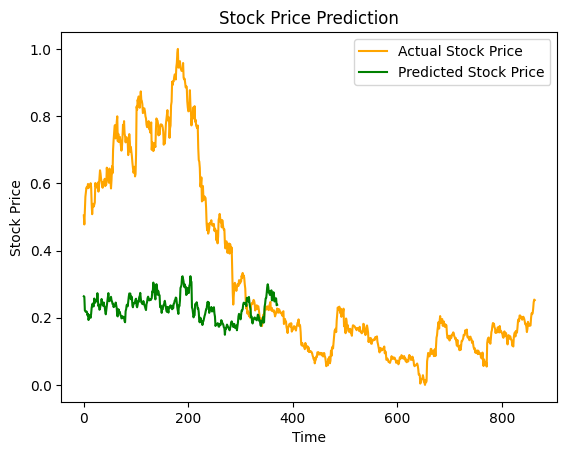

In [26]:
plt.plot(train_data, color = 'orange', label = 'Actual Stock Price')
plt.plot(test_data, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()